<a href="https://colab.research.google.com/github/RUTHKEBASO/python-coding/blob/main/Kebbs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
Data = pd.read_csv('kemmy.csv')
Data.head(30)

,Number_of_Casualties,Weather_Conditions
0,1,2
1,1,1
2,1,1
3,1,1
4,1,1
5,1,2
6,1,1
7,2,1
8,2,1
9,5,1


In [ ]:

duplicates = Data[Data['Weather_Conditions'].duplicated()]
duplicates1 = Data[Data['Number_of_Casualties'].duplicated()]
print(duplicates)
print(duplicates1)

         Number_of_Casualties  Weather_Conditions
2                           1                   1
3                           1                   1
4                           1                   1
5                           1                   2
6                           1                   1
...                       ...                 ...
1048570                     2                   1
1048571                     1                   1
1048572                     1                   1
1048573                     1                   1
1048574                     1                   3

[1048565 rows x 2 columns]
         Number_of_Casualties  Weather_Conditions
1                           1                   1
2                           1                   1
3                           1                   1
4                           1                   1
5                           1                   2
...                       ...                 ...
1048570               

In [ ]:
unique_values = Data.value_counts()
print(unique)

In [ ]:
null = Data.isnull().sum()
print(null)

In [ ]:
summary = Data.describe()
print(Data.info())
print(summary)

In [ ]:
import matplotlib.pyplot as plt
variables = Data.loc[:,['Weather_Conditions','Number_of_Casualties']]
Data.plot(x='Weather_Conditions',y='Number_of_Casualties',style='*')
plt.xlabel('Weather_Conditions')
plt.ylabel('Number_of_Casualties')
plt.show()

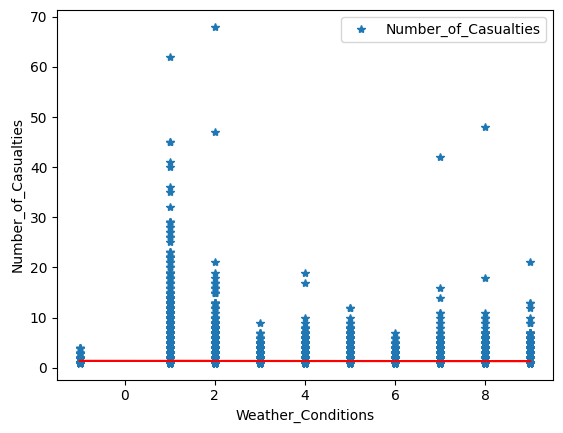

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
X = Data[['Weather_Conditions']]
y = Data[['Number_of_Casualties']]
regressor.fit(X,y)
Data.plot(x='Weather_Conditions',y='Number_of_Casualties',style='*')
plt.plot(X, regressor.predict(X), color='red', label='Regression line')
plt.xlabel('Weather_Conditions')
plt.ylabel('Number_of_Casualties')
plt.show()

In [ ]:
x = pd.DataFrame(Data['Weather_Conditions'])
y = pd.DataFrame(Data['Number_of_Casualties'])
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
regressor = LinearRegression()
regressor.fit(x_train,y_train)
print(regressor.intercept_)
print(regressor.coef_)
y_pred = regressor.predict(x_test)
# print(y_pred)
y_test

In [ ]:
#Evaluation
from sklearn import metrics
import numpy as np
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MAE", mae)
print("MSE", mse)
print("RMSE", rmse)

In [ ]:
#Save the model
import joblib
import pickle
#train the model
model = LinearRegression()
model.fit(x,y)
joblib.dump(model, 'kemmy.pkl')
with open('kemmy.pkl', 'wb') as file:
  pickle.dump(model, file)

In [ ]:
new_x = np.array([10,20,30,40,50]).reshape(-1,1)
model = joblib.load('kemmy.pkl')
predictions = model.predict(new_x)
new_data=pd.DataFrame({'x':new_x.flatten(), 'Predicted_y': predictions.flatten()})
print(new_data)

    x  Predicted_y
0  10     1.335250
1  20     1.304491
2  30     1.273731
3  40     1.242972
4  50     1.212213


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
